## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [4]:
display(X.isna().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##### Выводы:
1) Типы всех признаков - действительные числа. По всем признакам сумма НаН-ов равна 0. По всем признакам минимальное значение больше нуля (вдруг пропуски кодировались отрицательными числами, которые по физическому смыслу признаков невозможны). Можно сделать вывод, что пропусков в данных у нас нет. 
2) Убедились, что категориальных признаков нет. Ничего кодировать не будем. 

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
import seaborn as sns
# Посмотрим на распределение признаков, чтобы понять, каким методом масштабирования следует воспользоваться.

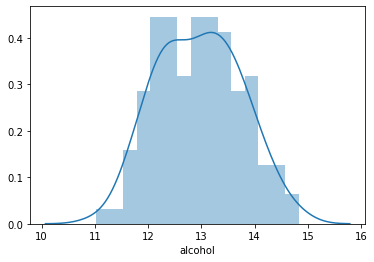

In [9]:
sns.distplot(X_train['alcohol'], bins=15)

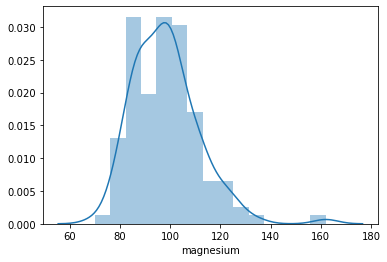

In [10]:
sns.distplot(X_train['magnesium'], bins=15)

##### Выводы:
Распределение признака "алкоголь" похоже на колокол, но имеет намек на двумодальность. 
<br><br>Распределение признака "магнезиум" скошено вправо и напоминает Хи-квадрат распределение.
<br><br>Учитывая данные факторы, я бы не стал использовать Standart Scaler (хотя могу и ошибаться, то есть использовать его можно смело в данной ситуации). Поэтому давайте воспользуемся Мин-Макс скейлером, который сжимает признаки на заданный диапазон (например, от 0 до 1). 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 

Если что, данный класс по умолчанию использует метрику Минковского 2ого порядка (что и является Евклидовым расстоянием)

In [12]:
minmax_scaler = preprocessing.MinMaxScaler()
X_test = minmax_scaler.fit_transform(X_test[['alcohol', 'magnesium']])
X_train = minmax_scaler.fit_transform(X_train[['alcohol', 'magnesium']])

In [13]:
neighbors_nums = [1, 3, 5, 10, 15, 25]
accuracies = dict()
classifiers = []

for neighbors_num in neighbors_nums:
    clf = KNeighborsClassifier(neighbors_num)
    clf.fit(X_train, y_train)
    y_predicted_test = clf.predict(X_test)
    y_predicted_train = clf.predict(X_train)
    accuracies[neighbors_num] = dict()
    accuracies[neighbors_num]['test'] = (np.mean(y_predicted_test == y_test))
    accuracies[neighbors_num]['train'] = (np.mean(y_predicted_train == y_train))
    classifiers.append(clf)

In [14]:
for neighbors_num in accuracies.keys():
    print(f'Число соседей = {neighbors_num}\n')
    print(f'Доля верных ответов на тестовой выборке = {np.round(accuracies[neighbors_num]["test"], 3)}')
    print(f'Доля верных ответов на "тренировочной выборке" = {np.round(accuracies[neighbors_num]["train"], 3)}')
    print('\n\n', '-' * 50)

Число соседей = 1

Доля верных ответов на тестовой выборке = 0.741
Доля верных ответов на "тренировочной выборке" = 0.992


 --------------------------------------------------
Число соседей = 3

Доля верных ответов на тестовой выборке = 0.741
Доля верных ответов на "тренировочной выборке" = 0.815


 --------------------------------------------------
Число соседей = 5

Доля верных ответов на тестовой выборке = 0.778
Доля верных ответов на "тренировочной выборке" = 0.798


 --------------------------------------------------
Число соседей = 10

Доля верных ответов на тестовой выборке = 0.704
Доля верных ответов на "тренировочной выборке" = 0.71


 --------------------------------------------------
Число соседей = 15

Доля верных ответов на тестовой выборке = 0.778
Доля верных ответов на "тренировочной выборке" = 0.669


 --------------------------------------------------
Число соседей = 25

Доля верных ответов на тестовой выборке = 0.815
Доля верных ответов на "тренировочной выборке" = 0.

Вообще говоря, считать метрики по тренировочной выборке не слишком корректно, потому что для каждого объекта из тренировочной выборки наша модель уже запомнила ровно такой же объект. Особенно бессмысленно это при числе соседей = 1, потому что алгоритм выдаст метку того же объекта. 

Кстати, еще один момент: в нашем случае оказывается, что от разбиения (random state) на тестовую и тренировочную выборки сильно зависит accuracy. Так, при рендом стейт = 21, доля верных ответов сильно снизится. То есть есть большая зависимость от того, какие именно данные "запомнит" наш алгоритм. 

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [15]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [16]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

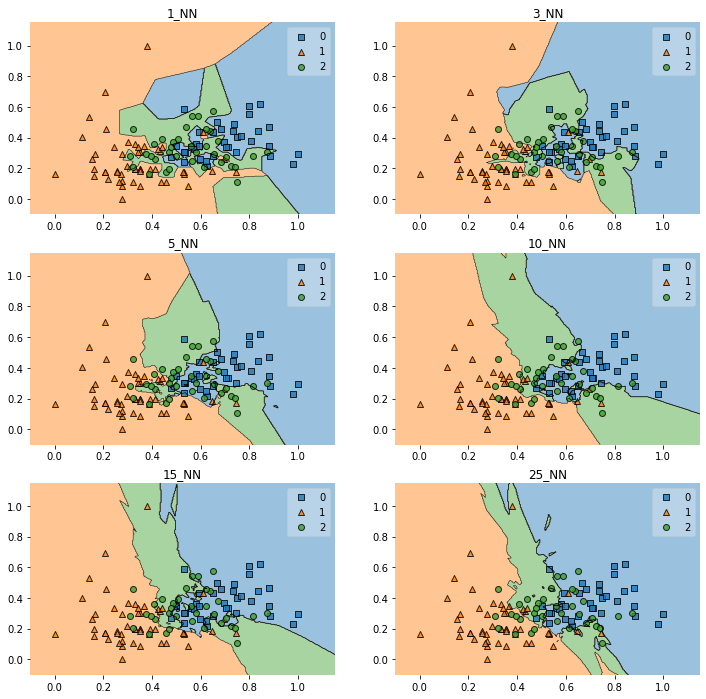

In [17]:
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(12,12))

labels = ['1_NN', '3_NN', '5_NN', '10_NN', '15_NN', '25_NN']
for clf, lab, grd in zip(classifiers,
                         labels,
                         [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1]]):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf)
    plt.title(lab)
    ax.set_xlim((-0.1, 1.15))
    ax.set_ylim((-0.1, 1.15))

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

##### Выводы:
Если судить по доле верных ответов, то стоит выбрать число соседей = 25. Смотря на визуализацию решающей поверхности, кажется, что число соседей, равное 15 или 25, действительно работает неплохо. <br><br>При данном числе соседей мы не впадаем в поиск частных случаев (как при маленьком числе соседей), то есть на графике почти нет кармашков, которые образуются из-за того, что объект стороннего класса попадает в толпу объектов одного класса. <br>И мы достаточно неплохо "генерализируем" наши выводы. Что выбрать конкретно - 15 или 25, я не знаю. <br><br>Визуально мне больше нравится график при числе соседей равном 15. Он кажется менее "рваным" и более гладким. 


### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

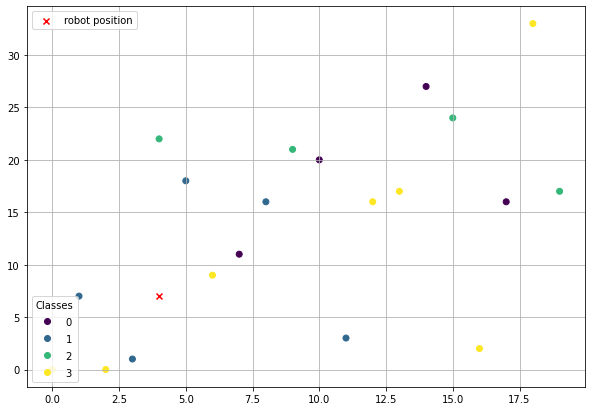

In [18]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'x', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [19]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        random_choice = np.random.binomial(n=1, p=.2) # С вероятностью 0.2 у нас выпадает "1"
        
        if random_choice == 1:
            self.trajectory.append(self.trajectory[-1] + self.mapping[0])
            
        else:
            choice = self.knn.predict(self.trajectory[-1].reshape(1, -1))  # Присваиваем класс
            self.trajectory.append(self.trajectory[-1] + self.mapping[choice[0]])


**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [20]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'x', label = 'robot position')

    plt.plot()
    plt.title(f'Число соседей = {k}')
    _ = plt.legend()
    _ = plt.grid()

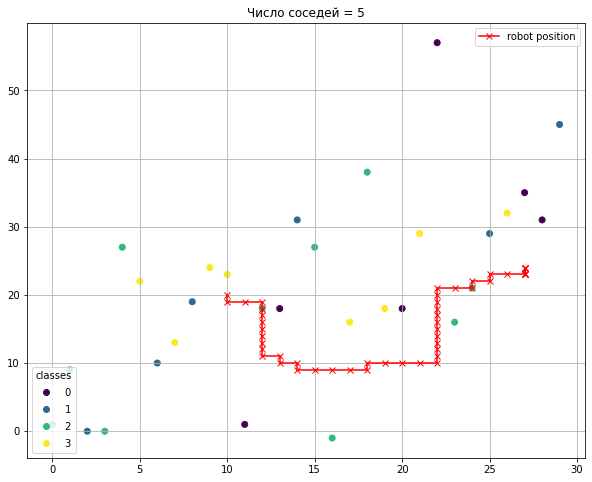

In [21]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

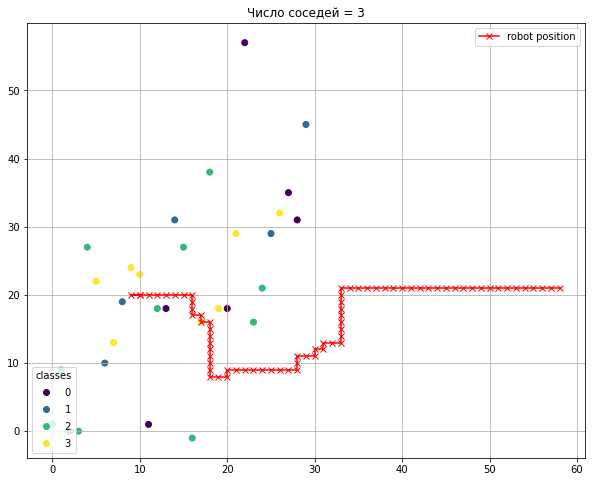

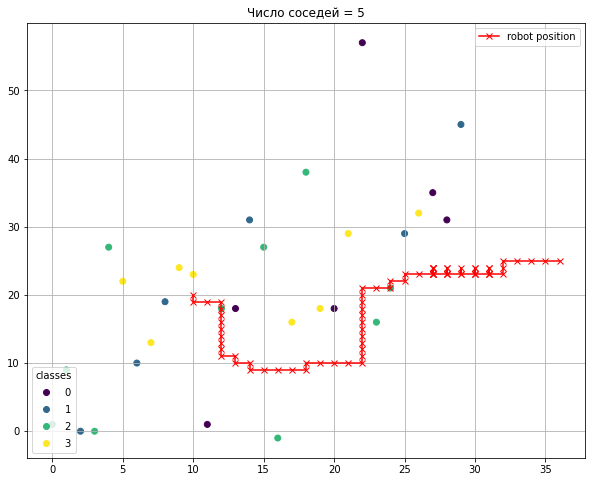

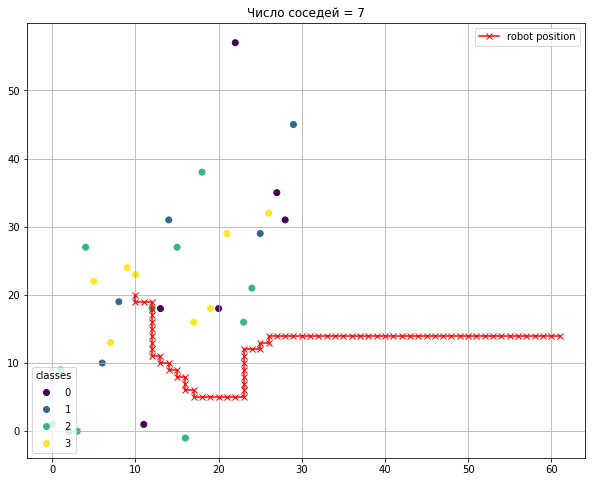

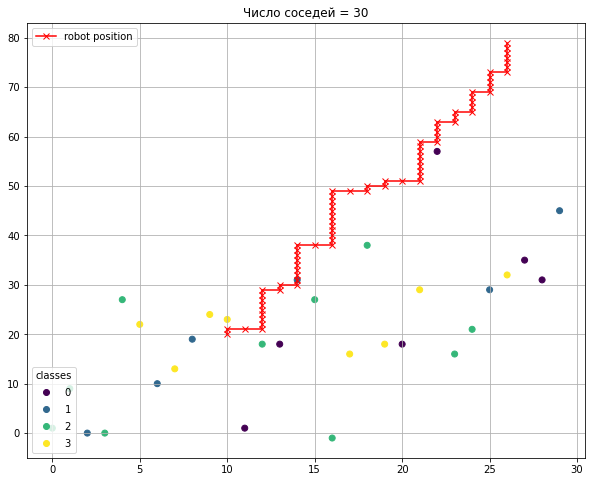

In [22]:
neighbors_nums = [3, 5, 7, 30]

for nn in neighbors_nums:
    conduct_experiment(np.arange(30), mean = 3, std = 10, k = nn, n_movements = 75)

##### Выводы:

Если взять достаточно большое число ходов (например, 100), то можно будет увидеть, что алгоритм движения при заданных точках расходится - робот просто уходит далеко вправо. Это связано с тем, что точек, связанных с движением вправо лежит больше, когда он начинает двигаться в правую сторону. Так произошло из-за случайной генерации классов. 
<br><br> А вот если мы за число соседей возьмем всю выборку, то робот будет двигаться вверх вправо, потому что больше всего в наборе меток, которые отвечают за движение вверх (цифра 2). Таким образом, робот зажат между рандомным движением вправо и движением вверх. 
<br><br>
Если же метки разбросаны не случайно, то робот будет двигаться более менее осознанно, если число соседей невелико. Например, можно было бы каждую точку пространства (дискретного целочисленного) пометить классом, который бы показывал, куда двигаться можно (одна и тоже точка может иметь несколько классов). Тогда, при числе соседей = 1, робот будет двигаться как будто по "дорожкам", хотя и с вероятностью 0.2 будет двигатсья вправо, что может привести врезанию в "стенку". Но, помня, что из одной точки потенциально можно двигаться в разные стороны, мы все равно будем двигаться хаотично, хоть и +- по правилам.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [23]:
data = pd.read_csv('diamonds.csv', index_col=0)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
data['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

##### Ячейка ниже служит удалению выбросов из модели. 

In [25]:
# too_big_price_mask = data['price'] > 1.5 * (data['price'].quantile(q=.75) - data['price'].quantile(q=.25)) + data['price'].quantile(q=.5)
# data = data[~too_big_price_mask]


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [26]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [28]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [29]:
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Кажется, что пропусков нет. 

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

Полагаю, что таких признаков тут просто нет. Все признаки несут определенный смысл. 

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [30]:
real_features_mask = (data.dtypes == "float64").values
numerical_data = pd.concat([data[data.columns[real_features_mask]], data['price']], axis=1)

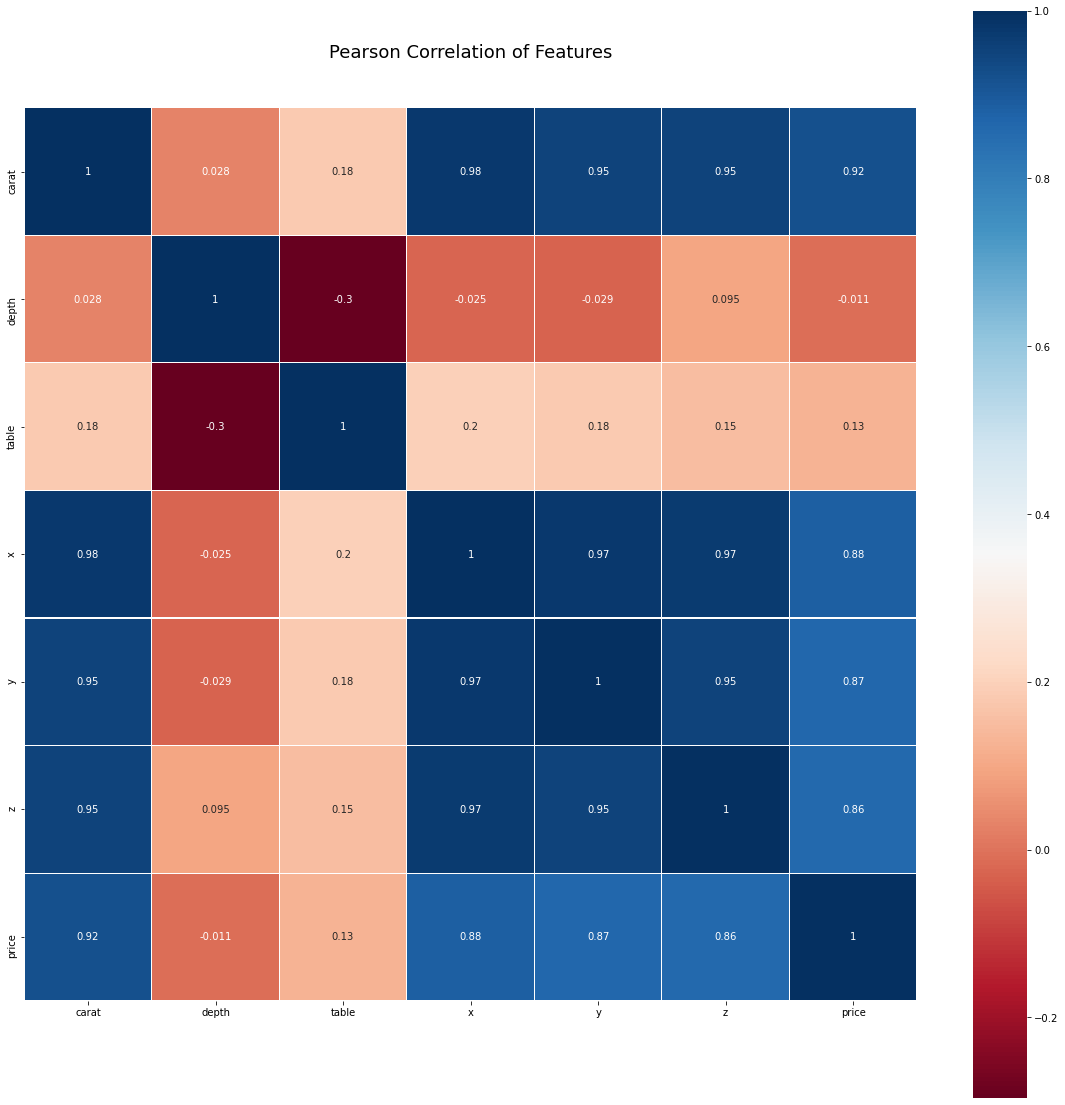

In [31]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(numerical_data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

##### Важные моменты:
1) Каратность и признаки, указывающие непосредственно на размер бриллианта в 3 измерениях имеют крайне высокую корреляцию с ценой - ожидаемо. 

2) Каратность и X, Y, Z имеют высокую корреляцию по той причине, что каратность = f(X, Y, Z) (но не линейная). 

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [32]:
y = data['price']
data.drop(columns=['price'], axis=1, inplace=True)
X = pd.get_dummies(data, drop_first=True)

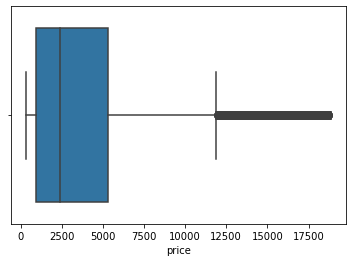

In [33]:
sns.boxplot(x=y)

Зачем тут этот график, если не просили? Показать, что среди цен есть много выбросов. Качество модели может быть не супер. 

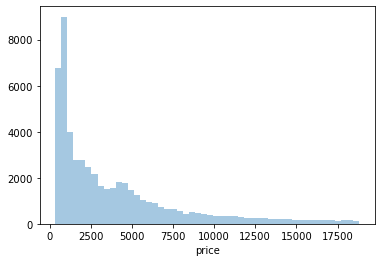

In [34]:
sns.distplot(y, kde=False)

Опять же видим, что у распределения довольно тяжелый хвост. 

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [36]:
std_scaler = preprocessing.StandardScaler()

real_features_mask = (X.dtypes == 'float64')
X_train_real = X_train[X_train.columns[real_features_mask]]
X_test_real = X_test[X_test.columns[real_features_mask]]

X_train_real_scaled = std_scaler.fit_transform(X_train_real)
X_test_real_scaled = std_scaler.fit_transform(X_test_real)

X_train_scaled = np.hstack([X_train_real_scaled, X_train[X_train.columns[~real_features_mask]].values])
X_test_scaled = np.hstack([X_test_real_scaled, X_test[X_test.columns[~real_features_mask]].values])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
def MSE(y, y_hat):
    return ((y - y_hat) ** 2).mean()

In [39]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

print(f'MSE на тестовой выборке = {MSE(y_test, y_hat)}')
train_prediction = lr.predict(X_train)
print(f'MSE на обучающей выборке = {MSE(y_train, train_prediction)}')

MSE на тестовой выборке = 1308173.3943128944
MSE на обучающей выборке = 1265975.87499481


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [40]:
columns = X.columns
coefs = lr.coef_

In [41]:
for column_coef in zip(columns[:6], coefs[:6]):
    print(f'Для признака {column_coef[0]} имеем коэффициент = {column_coef[1]}')

Для признака carat имеем коэффициент = 11304.413854042796
Для признака depth имеем коэффициент = -45.0885961710478
Для признака table имеем коэффициент = -25.812273264797092
Для признака x имеем коэффициент = -944.2433476058833
Для признака y имеем коэффициент = 85.97100708269312
Для признака z имеем коэффициент = -316.7761419771967


###### Переменные с необычно большими оценками коэффициентов: каратность (carat), длина (x) и глубина (z)

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [42]:
from sklearn.linear_model import Ridge, Lasso

In [43]:
hyper_param = 10


ridge = Ridge(hyper_param).fit(X_train, y_train)
lasso = Lasso(hyper_param).fit(X_train, y_train)

ridge_coeffs = ridge.coef_[:6]
lasso_coeffs = lasso.coef_[:6]

In [44]:
print('Ridge регрессия\n')
for column_coef in zip(columns[:6], ridge_coeffs[:6]):
    print(f'Для признака {column_coef[0]} имеем коэффициент = {column_coef[1]}')

print('\n\nLasso регрессия\n')
for column_coef in zip(columns[:6], lasso_coeffs[:6]):
    print(f'Для признака {column_coef[0]} имеем коэффициент = {column_coef[1]}')

Ridge регрессия

Для признака carat имеем коэффициент = 10979.817153887318
Для признака depth имеем коэффициент = -44.862787092700366
Для признака table имеем коэффициент = -26.44202344465129
Для признака x имеем коэффициент = -847.7362276239412
Для признака y имеем коэффициент = 92.50720264671016
Для признака z имеем коэффициент = -284.2053515273466


Lasso регрессия

Для признака carat имеем коэффициент = 9641.891193542006
Для признака depth имеем коэффициент = -98.0769588598872
Для признака table имеем коэффициент = -50.303318419523464
Для признака x имеем коэффициент = -471.8387266511142
Для признака y имеем коэффициент = -0.0
Для признака z имеем коэффициент = -0.0


###### Выводы: коэффициенты при некоторых признаках сдулись, но при других выросли, особенно в лассо-регрессии. Например, y и z вовсе стали равны нулю в оптимуме в лассо, но глубина и "table" стали более значимыми. 

<br><br> Я не уверен, что мультиколлинеарность в предудыщей модели реально проявлялась. Мультиколлинеарность - линейная зависимость между признаками объекта. Но исходя из "семантики" данных, у нас там не должно быть реальных линейных связей. Да, каратность - функция от Х, Y, Z, но не линейная, а произведение. 
<br><br>Вообще говоря, в эконометрике есть специальные тесты, задача которых - выявить мультиколлинеарность. Но пожалуй их я проводить не буду ))

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [45]:
alphas = [.1, 1, 10, 100, 200]
ridge_norms = []
lasso_norms = []

for alpha in alphas:
    r = Ridge(alpha).fit(X_train, y_train)
    l = Lasso(alpha).fit(X_train, y_train)
    
    ridge_norms.append(np.linalg.norm(r.coef_[:6]))
    lasso_norms.append(np.linalg.norm(l.coef_[:6]))
    


Text(0, 0.5, 'Норма вектора весов')

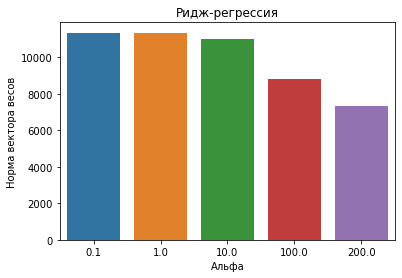

In [46]:
sns.barplot(x=alphas, y=ridge_norms)
plt.title('Ридж-регрессия')
plt.xlabel('Альфа')
plt.ylabel('Норма вектора весов')

Text(0, 0.5, 'Норма вектора весов')

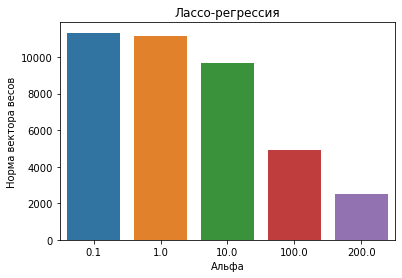

In [47]:
sns.barplot(x=alphas, y=lasso_norms)
plt.title('Лассо-регрессия')
plt.xlabel('Альфа')
plt.ylabel('Норма вектора весов')

Видно, что лассо-регрессия гораздо более агрессивно снижает веса. 
<br><br>Вероятно, регуляризатор-лассо используют для отбора признаков по той причине, что он агрессивней снижает размер весов, и тем самым уверенней сдувает оценки коэффициентов при тех признаках, которые практически не влият на качество предсказания модели, и лишь увеличивают функционал ошибки из-за штрафа лассо. 

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [48]:
from sklearn.linear_model import LassoCV

In [49]:
lasso_crossval = LassoCV(alphas=alphas, cv=5)

In [50]:
lasso_crossval.fit(X_train, y_train)

/Users/ilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708558830.192993, tolerance: 47806768.3816818
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)

In [51]:
errors = dict()
row = 0
for alpha in lasso_crossval.alphas_:
    errors[alpha] = lasso_crossval.mse_path_[row, :].mean()
    row += 1

In [52]:
errors

{200.0: 3633005.756973043,
 100.0: 2510346.133011006,
 10.0: 1513324.974287598,
 1.0: 1274458.1280662275,
 0.1: 1271684.4173129476}

##### Минимум ошибки достигается при альфа = 1. МСЕ на обучающей выборке = 1,274,458

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [53]:
lasso = Lasso(1).fit(X_train, y_train)
coeffs = lasso.coef_
colnames = X.columns

In [54]:
utilitary_counter = 0
for col_coeff in zip(coeffs, colnames):
    print(f'При переменной {col_coeff[1]} значение оценки коэффициента = {col_coeff[0]}')
    if utilitary_counter == 5:
        print('\n\nПошли категорийные переменные\n')
    utilitary_counter += 1

При переменной carat значение оценки коэффициента = 11136.948322336411
При переменной depth значение оценки коэффициента = -58.40669301688569
При переменной table значение оценки коэффициента = -29.04121279826751
При переменной x значение оценки коэффициента = -889.1160348069747
При переменной y значение оценки коэффициента = 7.012013414421302
При переменной z значение оценки коэффициента = -185.16163485592386


Пошли категорийные переменные

При переменной cut_Good значение оценки коэффициента = 431.62448528725747
При переменной cut_Ideal значение оценки коэффициента = 707.3946184024653
При переменной cut_Premium значение оценки коэффициента = 623.2222227289485
При переменной cut_Very Good значение оценки коэффициента = 601.8678564424569
При переменной color_E значение оценки коэффициента = -145.01762972427326
При переменной color_F значение оценки коэффициента = -191.67992744411566
При переменной color_G значение оценки коэффициента = -408.7399777870547
При переменной color_H значени

In [55]:
lasso.intercept_

# Свободный член регрессии

2484.8275142225584

#### Выводы:
1) Значимыми являются некоторые коэффициенты при бинарных переменных, посвященных огранке и "clarity". 

2) Первоочередно цену опеределяет каратность 

3) Параметры именно размера в координатах снижают стоимость (кроме "y"). Мне сложно понять, какой у этого физический смысл. Как мне кажется, отрицательно рождается из-за того, что между каратностью и размерами есть связь (положительная) и поэтому, чтобы компенсировать огромный коэффициент по переменной каратность, модель делает отрицательными коэффициенты при размере бриллианта в координатах.

4) Категорийная переменная Cut по существу является порядковой, так как уровень огранки влияет на цену по разному. 

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [56]:
y_hat_lasso = lasso.predict(X_test)

In [57]:
print('Классическая регрессия', MSE(y_hat, y_test))
print('Лассо-регрессия', MSE(y_hat_lasso, y_test))

Классическая регрессия 1308173.3943128944
Лассо-регрессия 1310579.881889714


В данном случае получилось так, что ошибки примерно равны. Есть разница в пару тысяч, но при MSE, исчисляемой сотнями тысяч, это сущий пустяк. 

<br><br>Как мне кажется, на основании этих знаний сложно сказать, какую модель лучше использоваться. Скажем так, нам явно не хватает признаков для того, чтобы полностью описать цену бриллианта. Или сама по себе линейная модель плохо это делает. 
<br><br>Следуя советам, я бы использовал лассо-регрессию, так как она, по идее, более "устойчива" и убивает переобученность модели (точнее, не дает переобучиться). Но исходя исключительно из опыта, полученного в рамках данного задания, сказать сложно. 